In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
num_records = 500
num_attributes = 5

X = np.random.rand(num_records, num_attributes)
y = np.random.randint(0, 2, num_records)

df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(num_attributes)])
df['Target'] = y

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.374540,0.950714,0.731994,0.598658,0.156019,0
1,0.155995,0.058084,0.866176,0.601115,0.708073,0
2,0.020584,0.969910,0.832443,0.212339,0.181825,0
3,0.183405,0.304242,0.524756,0.431945,0.291229,0
4,0.611853,0.139494,0.292145,0.366362,0.456070,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]

rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict_proba(X_test)[:, 1]

In [5]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)

log_reg_auc = roc_auc_score(y_test, log_reg_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

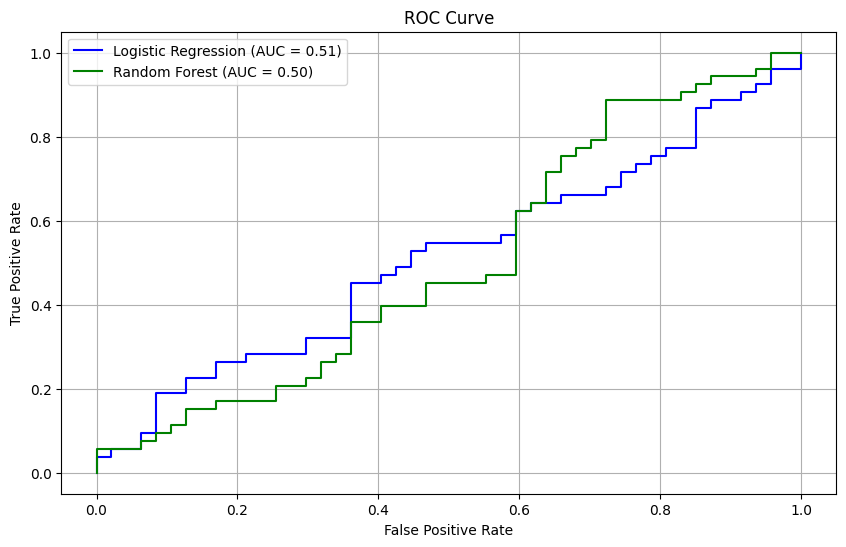

Logistic Regression AUC: 0.51
Random Forest AUC: 0.50


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_auc), color='blue')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc), color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print('Logistic Regression AUC: {:.2f}'.format(log_reg_auc))
print('Random Forest AUC: {:.2f}'.format(rf_auc))